(60000, 28, 28)
0


Text(0, 0.5, 'Frequency')

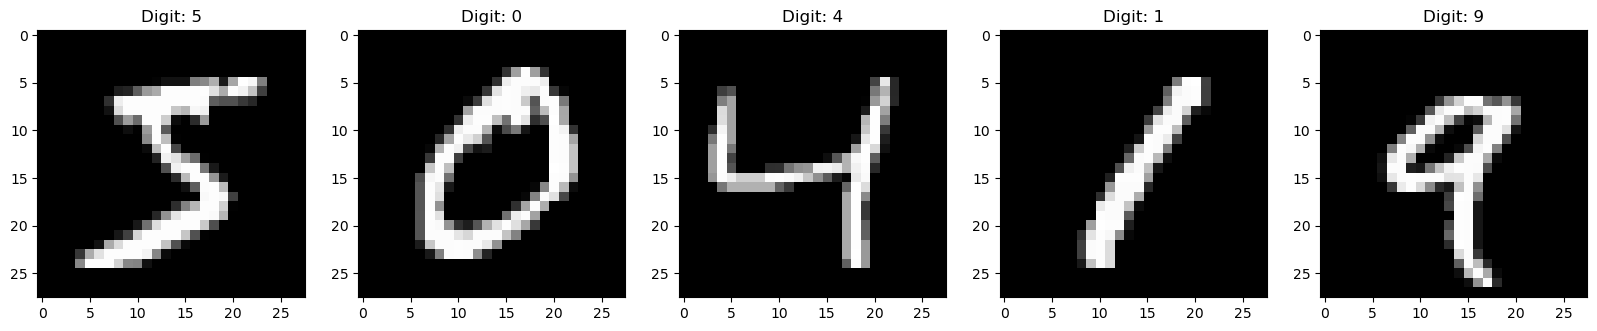

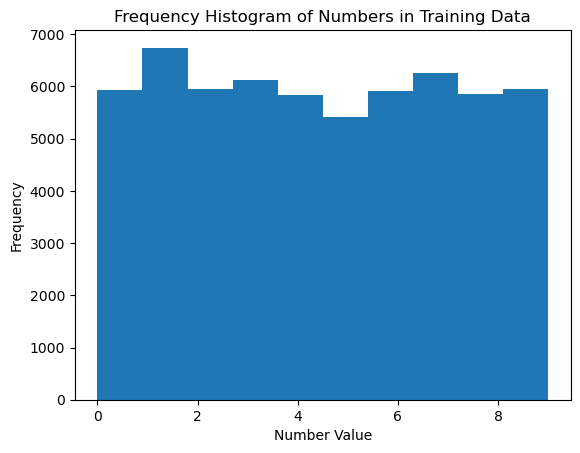

In [89]:
# We are going to write out a simple neural net from scratch, implementing backpropagation

import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import keras
# Load the MNIST data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# The data is in the following format:
# mnist.train.images is a tensor (an n-dimensional array) with a shape of [55000, 784]
# mnist.train.labels is a tensor with a shape of [55000, 10]
# mnist.test.images is a tensor with a shape of [10000, 784]
# mnist.test.labels is a tensor with a shape of [10000, 10]

# Show the first 5 images in the training set
fig = plt.figure(figsize=(20, 20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Digit: {}'.format(y_train[i]))

print(x_train.shape)
print(y_train[1])

# make frequency histogram of the labels
plt.figure()

plt.hist(y_train, bins=10)
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

In [80]:
# Define sigmoid and sigmoid_prime functions

def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

# Test sigmoid prime function


print(sigmoid_prime(1000))

# Test sigmoid funcrtion on a 3x3 matrix
print(sigmoid(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])))

0.0
[[0.73105858 0.88079708 0.95257413]
 [0.98201379 0.99330715 0.99752738]
 [0.99908895 0.99966465 0.99987661]]


In [101]:
import numpy as np

# Define layers and initialize weights (including biases)
layers = [784, 10000, 10]
e_init = 0.12
weights = []

for i in range(len(layers) - 1):
    # Set starting weights (including biases) uniformly between [-e_init, e_init]
    # Add an extra row for biases and set it to 1
    weight_matrix = np.random.uniform(-e_init,
                                      e_init, (layers[i + 1], layers[i] + 1))
    weight_matrix[:, -1] = 1.0  # Set the last column to 1 for biases
    weights.append(weight_matrix)

# Here, weights is a list of matrices, where each matrix is the weight matrix for the layer.
# Each weight matrix is structured such that the ith row and jth column of the matrix is the weight
# for the connection between the ith neuron in the current layer and the jth neuron in the next layer.

In [106]:
# Define the cost function
def cost_function(y, h):
    return np.sum(y-h)**2


def forward_propagation(x, weights):
    activations = [x]  # Start with the input layer's activations
    z = [0]
    for i in range(len(weights)):
        # Add bias unit to the last layer's activations
        activations[-1] = np.hstack((activations[-1], 1))
        z.append(np.dot(weights[i], activations[-1]))
        # Add the new layer's activations to the list
        activations.append(sigmoid(z[-1]))

    return activations, z  # Now this returns a list of activations for each layer


# Test forward prop for dimension errors
x = x_train[0].reshape(784)
print(x.shape)
activations, z = forward_propagation(x, weights)
print(activations[-1])
print(cost_function(y_train[0], activations[-1]))

(784,)
[9.83550019e-01 9.85471546e-01 1.24698962e-02 4.30102621e-02
 9.57226057e-01 9.85302464e-01 5.06569062e-03 8.89960100e-01
 1.23121977e-02 8.52004664e-04]
5.046624097156218


In [100]:
# Now, we implement backpropagation

def backpropagation(x_train, y_train, weights, layers, batch_size, epochs):
    for e in range(epochs):
        for i in range(batch_size):
            # Initialize a list to store errors for each layer
            errors = [np.zeros(layer) for layer in layers]

            # Reshape input and get the ground truth labels
            x = x_train[i].reshape(784)
            y = y_train[i]

            # Forward propagation
            activations, z = forward_propagation(x, weights)

            # Calculate the error at the output layer
            errors[-1] = activations[-1] - y

            # Backpropagate the error through hidden layers
            for layer_index in range(len(weights) - 2, -1, -1):
                errors[layer_index] = np.dot(weights[layer_index + 1], errors[layer_index + 1]) * sigmoid_prime(z[layer_index])

            # Update weights using error and gradients
            for layer_index in range(len(weights)):
                gradient = np.outer(activations[layer_index], errors[layer_index])
                weights[layer_index] -= 0.01 * gradient


backpropagation(x_train, y_train, weights, layers, 100, 1)

ValueError: shapes (10,101) and (100,) not aligned: 101 (dim 1) != 100 (dim 0)